In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

def erf(x):
    r = list()
    for xi in x:
        r.append(math.erf(xi))
    return np.array(r)

def gelu(x):
    y = x*(1+erf(x/math.sqrt(2)))/2
    return np.array(y) 

def relu(x):
    return np.array(x * (x > 0))

def sigmoid(x):
    return np.array(1/(np.exp(-x) + 1))

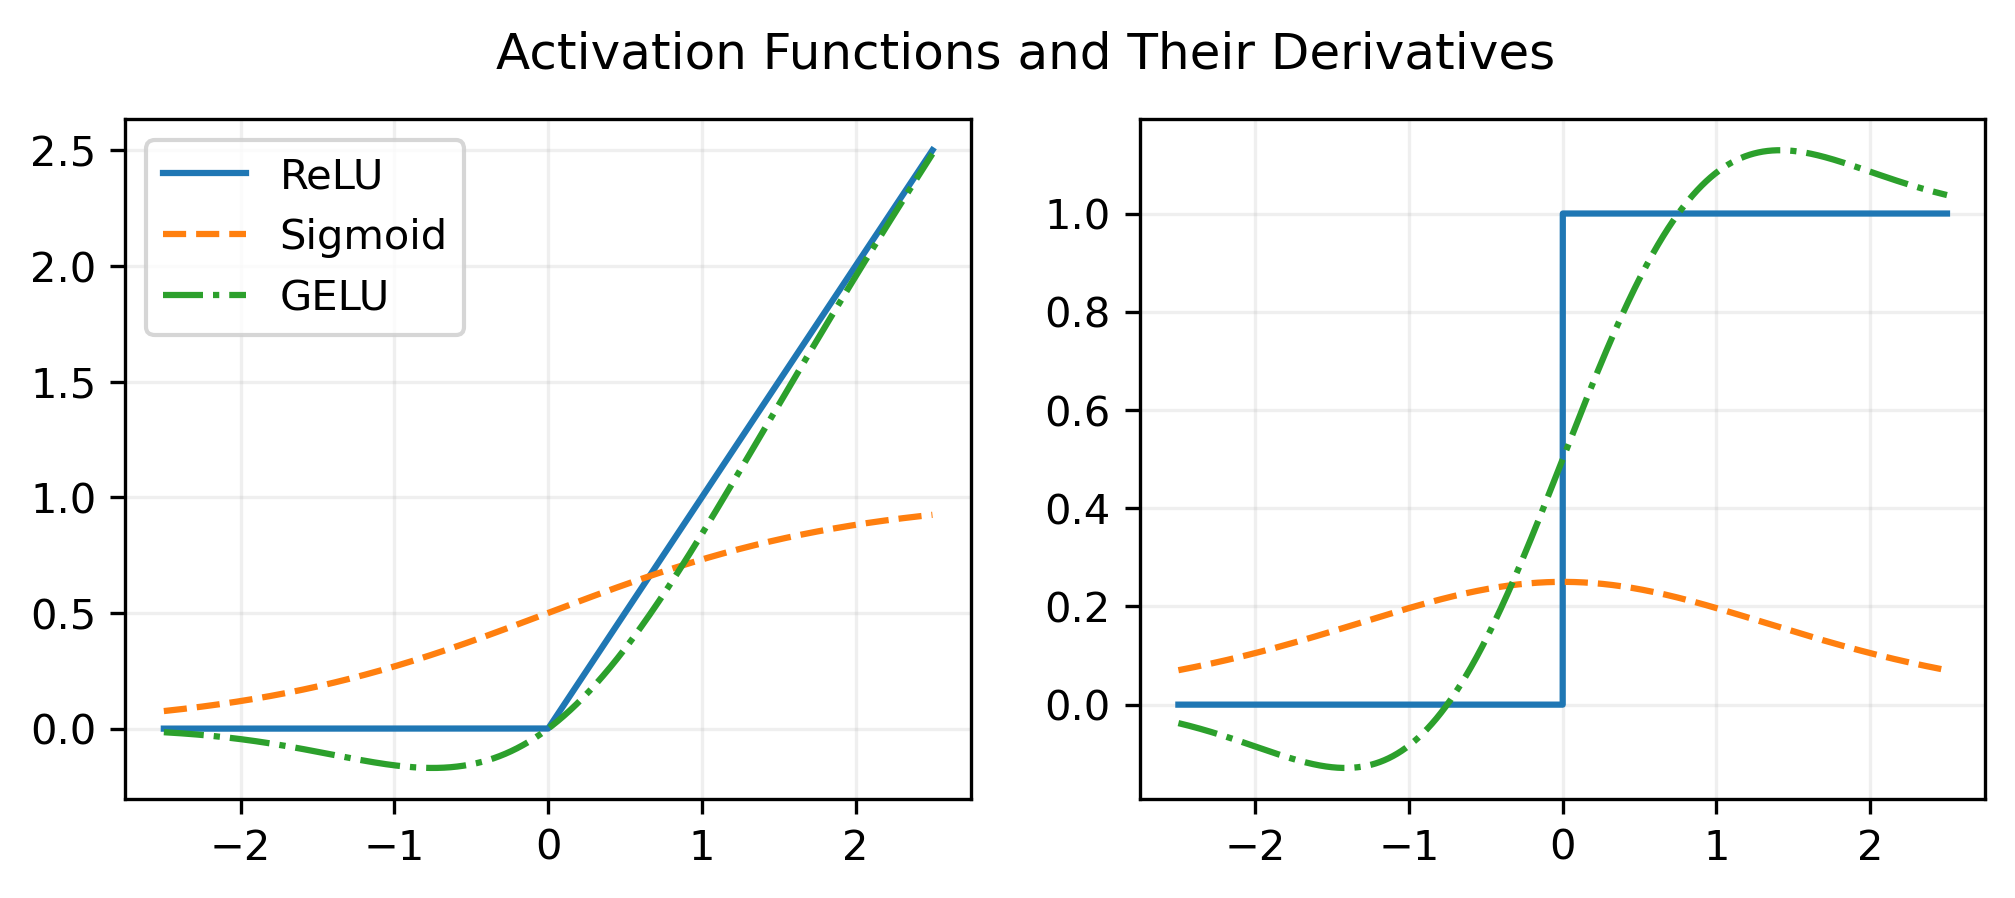

In [3]:
xm = 2.5
d1 = 100000

plt.rcParams["figure.figsize"] = (8,3)

x = np.linspace(-xm,xm,int(2*xm*d1))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(300)

ax1.plot(x, relu(x), label='ReLU')
ax1.plot(x, sigmoid(x), '--' , label='Sigmoid')
ax1.plot(x, gelu(x), '-.', label='GELU')

ax1.legend()
ax1.grid(alpha=0.2)

fig.suptitle('Activation Functions and Their Derivatives')

xd = x[:-1]

ax2.plot(xd, d1*np.diff(relu(x)), label='ReLU')
ax2.plot(xd, d1*np.diff(sigmoid(x)), '--' , label='Sigmoid')
ax2.plot(xd, d1*np.diff(gelu(x)), '-.', label='GELU')
ax2.grid(alpha=0.2)

plt.show()
fig.savefig('results/activ.pdf')

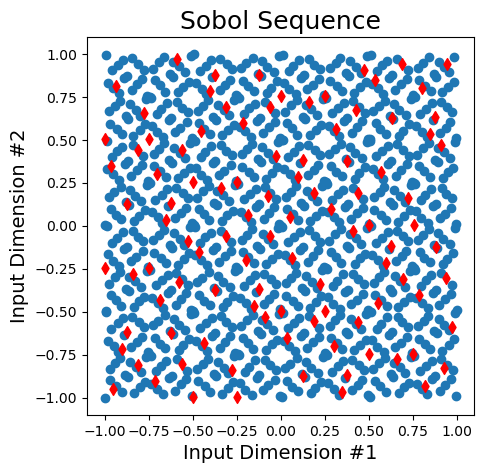

In [6]:
from torch.quasirandom import SobolEngine
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

sobol_engine = SobolEngine(2)
X = 2*sobol_engine.draw(1000) - 1
Y = 2*sobol_engine.draw(100) - 1

plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1], c='r', marker='d')

plt.xlabel('Input Dimension #1', fontsize=14)
plt.ylabel('Input Dimension #2', fontsize=14)

plt.title('Sobol Sequence', fontsize=18)

plt.savefig('results/sobol_input.pdf')
plt.show()


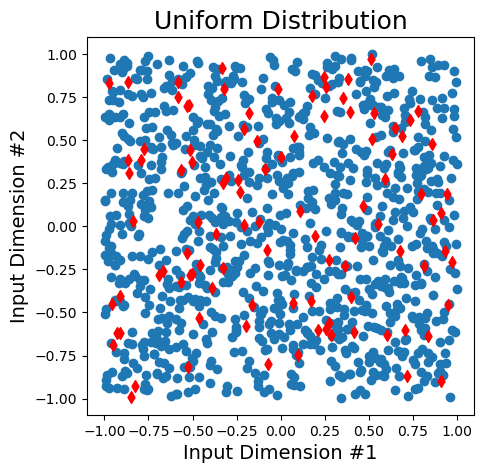

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

X = np.random.uniform(-1,+1,(1000,2))
Y = np.random.uniform(-1,+1,(100,2))

plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1], c='r', marker='d')

plt.xlabel('Input Dimension #1', fontsize=14)
plt.ylabel('Input Dimension #2', fontsize=14)

plt.title('Uniform Distribution', fontsize=18)

plt.savefig('results/uniform_input.pdf')
plt.show()

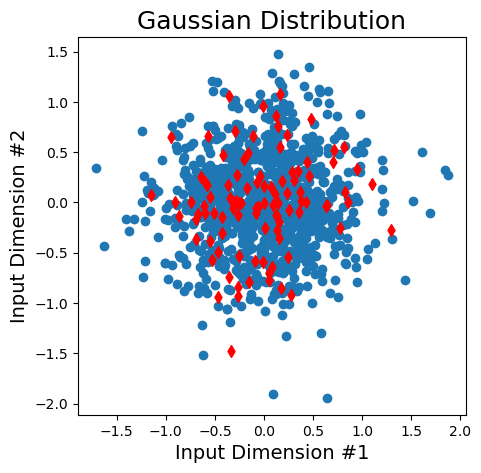

In [8]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

X = np.random.normal(0,+0.5,(1000,2))
Y = np.random.normal(0,+0.5,(100,2))

plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1], c='r', marker='d')

plt.xlabel('Input Dimension #1', fontsize=14)
plt.ylabel('Input Dimension #2', fontsize=14)

plt.title('Gaussian Distribution', fontsize=18)

plt.savefig('results/gaussian_input.pdf')
plt.show()